### A1 F(x), sharp ratio, draw downs

In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import talib
print("set up done")

set up done


In [8]:
# download data
aapl_df = yf.download('AAPL',
                     period='1y',
                     interval='1h',
                     progress=True,
                    )
# ticker = yf.Ticker('AAPL')
# aapl_df = ticker.history(period="1y")
aapl_df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-05-24 11:30:00-04:00,190.110001,190.580002,189.729996,190.379898,190.379898,3569741
2024-05-24 12:30:00-04:00,190.380005,190.559998,190.229996,190.414993,190.414993,2486685
2024-05-24 13:30:00-04:00,190.419998,190.464996,190.054993,190.149994,190.149994,3081217
2024-05-24 14:30:00-04:00,190.149994,190.389999,189.934998,190.089996,190.089996,2750429
2024-05-24 15:30:00-04:00,190.085007,190.240005,189.820007,189.979996,189.979996,3538245


,Open,High,Low,Close,Adj Close,Volume,ADX,OBV,RSI,fx,Action,Return
Datetime,,,,,,,,,,,,
2024-05-24 11:30:00-04:00,190.110001,190.580002,189.729996,190.379898,190.379898,3569741,34.851657,297128713.0,52.599157,0.384271,1,NaN
2024-05-24 12:30:00-04:00,190.380005,190.559998,190.229996,190.414993,190.414993,2486685,32.597969,299615398.0,52.811885,0.360747,1,NaN
2024-05-24 13:30:00-04:00,190.419998,190.464996,190.054993,190.149994,190.149994,3081217,30.695309,296534181.0,50.952435,0.327990,1,NaN
2024-05-24 14:30:00-04:00,190.149994,190.389999,189.934998,190.089996,190.089996,2750429,29.062311,293783752.0,50.518746,0.308035,1,NaN
2024-05-24 15:30:00-04:00,190.085007,190.240005,189.820007,189.979996,189.979996,3538245,27.678522,290245507.0,49.683769,0.288707,1,NaN


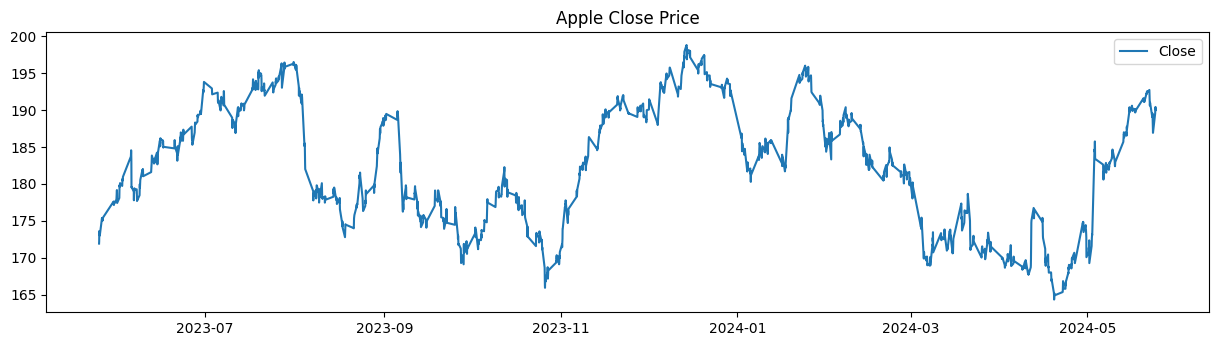

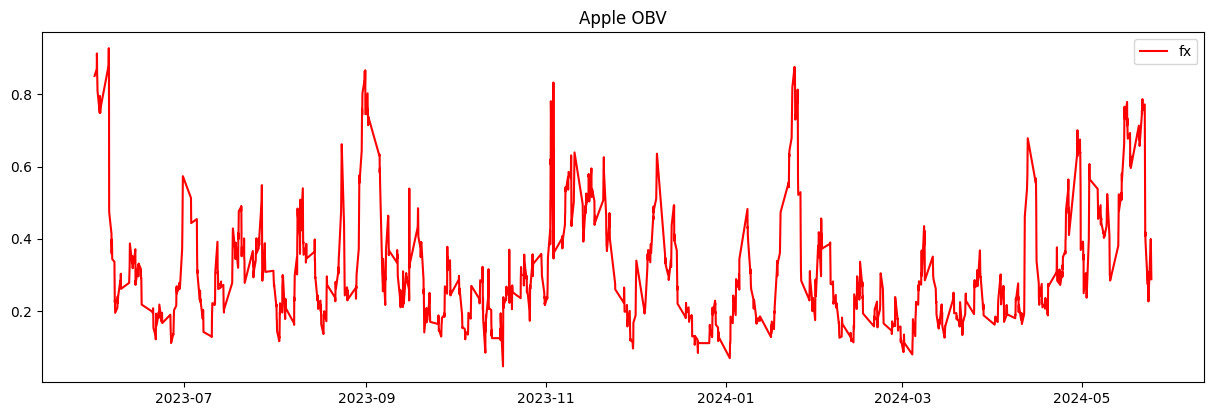

In [282]:
# Caluclate f(x) using ADX, OBV, RSI

# Calculate ADX
aapl_df["ADX"] = talib.ADX(aapl_df['High'], 
                           aapl_df['Low'], 
                           aapl_df['Close'], 
                           timeperiod=14)
# calculate OBV
aapl_df["OBV"] = talib.OBV(aapl_df['Close'], aapl_df['Volume'])
# calculate RSI
aapl_df["RSI"] = talib.RSI(aapl_df['Close'], timeperiod=14)

# calculate fx
aapl_df["fx"] = ((aapl_df["ADX"])*((0.05* aapl_df["OBV"]/aapl_df['OBV'].shift(1)) + aapl_df["RSI"]/50))/100

# plot f(x) with the close price 
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
plt.plot(aapl_df['Close'], label='Close')
plt.title('Apple Close Price')
plt.legend()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
plt.plot(aapl_df['fx'], label='fx', color='red')
plt.title('Apple OBV')
plt.legend()

aapl_df.tail()

In [285]:
# buying if the fx is greater than 0.5 and selling if the fx is less than 0.5
aapl_df["Action"] = aapl_df.apply(lambda row: -1 if row["fx"] > 0.5  else 1, axis=1)    # (1 if row["fx"] < 0.5 else 0)

# Calculate the return column
aapl_df["Return"] = np.nan
# Trade intialization price
price = 0
# inTrade = 0 if no trade is taken, +1 if Bought, -1 if Sold
inTrade = 0
for i, row in aapl_df.iterrows():
    if row["Action"] != 0 and inTrade == 0:
        # print("Taking trade")
        # print(row["fx"], row["Close"])
        inTrade = row["Action"]
        price = -1 * (row["Close"] * inTrade)
    if row["Action"] == -1 * inTrade and inTrade != 0:
        profit = ((row["Close"] * inTrade) + price)/abs(price)
        # print("Closing trade")
        # print(row["fx"], row["Close"])
        # print(profit)
        aapl_df.at[i, "Return"] = profit
        inTrade = 0
print("Return: " + str(round(aapl_df["Return"].sum()*100, 2)) + "%")
aapl_df.tail()


Return: 35.09%


,Open,High,Low,Close,Adj Close,Volume,ADX,OBV,RSI,fx,Action,Return
Datetime,,,,,,,,,,,,
2024-05-24 11:30:00-04:00,190.110001,190.580002,189.729996,190.379898,190.379898,3569741,34.851657,297128713.0,52.599157,0.384271,1,NaN
2024-05-24 12:30:00-04:00,190.380005,190.559998,190.229996,190.414993,190.414993,2486685,32.597969,299615398.0,52.811885,0.360747,1,NaN
2024-05-24 13:30:00-04:00,190.419998,190.464996,190.054993,190.149994,190.149994,3081217,30.695309,296534181.0,50.952435,0.327990,1,NaN
2024-05-24 14:30:00-04:00,190.149994,190.389999,189.934998,190.089996,190.089996,2750429,29.062311,293783752.0,50.518746,0.308035,1,NaN
2024-05-24 15:30:00-04:00,190.085007,190.240005,189.820007,189.979996,189.979996,3538245,27.678522,290245507.0,49.683769,0.288707,1,NaN


In [286]:
aapl_df["Action"].value_counts()

Action
 1    1518
-1     238
Name: count, dtype: int64

In [287]:
# Analysis
# Sharp Ration
# taking 4% treasure bill as risk free rate
def sharp_ratio(df):
    return (df["Return"].mean() - 0.04)/df["Return"].std()
print( "Sharp Ratio:",sharp_ratio(aapl_df))
# print(aapl_df["Return"].mean())
#drawdown
def drawdown(df):
    return df["Return"].max()  - df["Return"].min()
print("Draw Down: " + str(round(drawdown(aapl_df)*100, 2)) + "%")
#Rolling Returns
def rolling_returns(df, window):
    x = df["Return"].dropna()
    return x.rolling(window).sum()
print("Rolling returns: "+ str(round(rolling_returns(aapl_df, 7).mean()*100, 2)) + "%")

Sharp Ratio: -1.1016792727517288
Draw Down: 17.28%
Rolling returns: 4.84%
